In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import os
os.getcwd()

'C:\\Users\\USER'

In [3]:
os.chdir('C:\\Users\\USER\\Documents\\python_works')

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.columns = [i.replace('-','_') for i in df.columns]  
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
cat_col = df.select_dtypes(include =['object']).columns

In [11]:
original_columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [12]:
col_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df.columns = col_names

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df.columns = original_columns

In [15]:
df

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [17]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

## Dividing the variables into numerical and categorical types

In [18]:
categorical_col = [i for i in df.columns if df[i].dtype == 'O']
print('There are {} categorical columns'.format(len(categorical_col)))
print('The categorical variables are: \n\n', categorical_col)

There are 9 categorical columns
The categorical variables are: 

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income']


In [19]:
categorical_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'income']

In [20]:
#alternatively,
cate_col =[]
for i in df.columns:
    if df[i].dtype == 'O':
        cate_col.append(i)
cate_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'income']

In [21]:
len(cate_col)

9

In [22]:
num_col =[]
for i in df.columns:
    if df[i].dtype != 'O':
        num_col.append(i)
num_col

['age',
 'fnlwgt',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [23]:
df[cate_col]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [24]:
df[num_col]

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


### Missing values in categorical variables

In [25]:
df[cate_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       48842 non-null  object
 1   education       48842 non-null  object
 2   marital_status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   native_country  48842 non-null  object
 8   income          48842 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [26]:
df[cate_col].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
native_country    0
income            0
dtype: int64

In [27]:
#Freqeuncy counts of categorical variables
for i in cate_col:
    print(df[i].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         561

In [28]:
for i in cate_col:
    print(df[i].value_counts()/np.float(len(df)))

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital_status, dtype: float64


Now, we can see that there are several variables like workclass, occupation and native_country 
which contain missing values. Generally, the missing values are coded as NaN and python will 
detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values
because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python
can detect these missing values.

I will explore these variables and replace ? with NaN.

In [29]:
df.workclass.unique(), df.workclass.value_counts()

(array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
 Name: workclass, dtype: int64)

In [30]:
#There are 2799 ? that need to be replace with NaN
df.workclass.replace('?', np.NaN, inplace = True)

In [31]:
df.workclass.value_counts(), df.workclass.value_counts().sum()

(Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
 Name: workclass, dtype: int64,
 46043)

In [32]:
df[cate_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       46043 non-null  object
 1   education       48842 non-null  object
 2   marital_status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   native_country  48842 non-null  object
 8   income          48842 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [33]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [34]:
df.occupation.replace('?', np.NaN, inplace = True)

In [35]:
df.occupation.value_counts(), df.occupation.value_counts().sum()

(Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
 Name: occupation, dtype: int64,
 46033)

In [36]:
df.native_country.value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [37]:
df.native_country.replace('?', np.NaN, inplace = True)

In [38]:
df.native_country.value_counts(), df.native_country.value_counts().sum()

(United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 Peru                             46
 

In [39]:
df[cat_col].isnull().sum()

workclass         2799
education            0
marital_status       0
occupation        2809
relationship         0
race                 0
gender               0
native_country     857
income               0
dtype: int64

## Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is
known as high cardinality. High cardinality may pose some serious problems in the machine learning model. 
So, I will check for high cardinality.

In [40]:
for i in cat_col:
    print(i, 'contains', len(df[i].unique()), 'labels')

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
gender contains 2 labels
native_country contains 42 labels
income contains 2 labels


In [41]:
#filling missing values in categorical variables with most occurence values.
df['occupation'].fillna(df.occupation.mode()[0], inplace = True)

In [42]:
df['workclass'].fillna(df.workclass.mode()[0], inplace = True)
df['native_country'].fillna(df.native_country.mode()[0], inplace = True)

In [43]:
df[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       48842 non-null  object
 1   education       48842 non-null  object
 2   marital_status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   gender          48842 non-null  object
 7   native_country  48842 non-null  object
 8   income          48842 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [44]:
df[cat_col].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
native_country    0
income            0
dtype: int64

In [45]:
for i in cat_col:
    print(len(df[i].unique()))

8
16
7
14
6
5
2
41
2


In [46]:
lb = pre.LabelEncoder()

In [47]:
x= df.drop('income', axis =1)
y = df.income

In [48]:
x

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [49]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [50]:
x['gender'] = lb.fit_transform(x.gender)

In [51]:
x

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States


In [52]:
x = pd.get_dummies(x, drop_first = True)

In [53]:
x

,age,fnlwgt,educational_num,gender,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [54]:
robust = pre.RobustScaler()

In [55]:
for i in x.columns:
    x[i] = robust.fit_transform(x[[i]])

In [56]:
x

,age,fnlwgt,educational_num,gender,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,-0.60,0.405170,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05,-0.735527,-0.333333,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.45,1.322379,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.35,-0.148399,0.000000,0.0,7688.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.95,-0.621589,0.000000,-1.0,0.0,0.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.50,0.659143,0.666667,-1.0,0.0,0.0,-0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.15,-0.197937,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48839,1.05,-0.218454,-0.333333,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48840,-0.75,0.194398,-0.333333,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

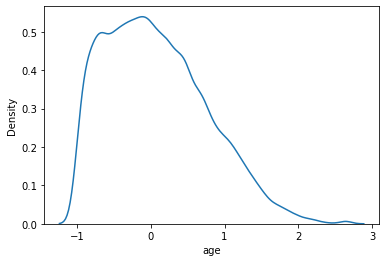

In [57]:
sns.kdeplot(x.age)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.3, stratify = y)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34189, 97), (34189,), (14653, 97), (14653,))

In [60]:
gnb = GaussianNB()

In [61]:
gnb.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred = gnb.predict(X_test)


In [63]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [64]:
y_test

28873    <=50K
4252     <=50K
24931    <=50K
9325      >50K
22088    <=50K
         ...  
7488     <=50K
2078      >50K
2122     <=50K
34365    <=50K
39860    <=50K
Name: income, Length: 14653, dtype: object

In [65]:
predictions = pd.DataFrame(y_pred, columns = ['prediction'])
predictions

,prediction
0,<=50K
1,<=50K
2,<=50K
3,>50K
4,<=50K
...,...
14648,<=50K
14649,<=50K
14650,>50K
14651,<=50K


In [66]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8237


In [67]:
#check for overfitting by predicting for both test dataset and train datasets
y_train_pred = gnb.predict(X_train)

In [68]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.8257


### Insigt:
There is no presence of underfitting or overfitting, since the two values shows no sign of bigger difference **0.8237** and **0.8257**
    


# Null Accuracy

## Compare model accuracy with null accuracy
So, the model accuracy is 0.8237. But, we cannot say that our model is very good based on the above accuracy.
We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting 
the most frequent class.

So, we should first check the class distribution in the test set.

In [69]:
#check class distribution in test set

y_test.value_counts()

<=50K    11147
>50K      3506
Name: income, dtype: int64

In [70]:
null_accuracy = (11147/(11147+3506))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7607


We can see that our model accuracy score is 0.8237 but null accuracy score is 0.7607. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9563 1584]
 [1000 2506]]

True Positives(TP) =  9563

True Negatives(TN) =  2506

False Positives(FP) =  1584

False Negatives(FN) =  1000


<AxesSubplot:>

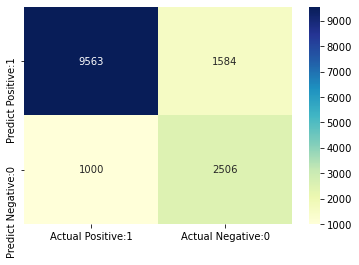

In [72]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices 

Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, 
recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.86      0.88     11147
        >50K       0.61      0.71      0.66      3506

    accuracy                           0.82     14653
   macro avg       0.76      0.79      0.77     14653
weighted avg       0.84      0.82      0.83     14653



In [74]:
y_pred_prob = (gnb.predict_proba(X_test))[0:20]

y_pred_prob

array([[9.99999814e-01, 1.86447911e-07],
       [1.00000000e+00, 2.13394443e-11],
       [9.99316516e-01, 6.83484211e-04],
       [2.31077705e-15, 1.00000000e+00],
       [1.00000000e+00, 6.62857223e-12],
       [7.46031027e-01, 2.53968973e-01],
       [9.99948158e-01, 5.18415543e-05],
       [5.12277744e-02, 9.48772226e-01],
       [2.44749712e-03, 9.97552503e-01],
       [9.99855395e-01, 1.44605063e-04],
       [9.99998553e-01, 1.44714957e-06],
       [9.99999878e-01, 1.22463509e-07],
       [9.99998985e-01, 1.01549117e-06],
       [9.79097612e-01, 2.09023876e-02],
       [9.99119979e-01, 8.80021199e-04],
       [8.79058650e-01, 1.20941350e-01],
       [8.10497004e-01, 1.89502996e-01],
       [9.99999983e-01, 1.74928061e-08],
       [2.14347716e-01, 7.85652284e-01],
       [1.97141219e-01, 8.02858781e-01]])

Observations
In each row, the numbers sum to 1.
There are no columns which correspond to 2 classes - <=50K and >50K.

Class 0 => <=50K - Class that a person makes less than equal to 50K.

Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.
Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [75]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of <=50K', 'Prob of >50K'])

y_pred_prob_df

,Prob of <=50K,Prob of >50K
0,9.999998e-01,1.864479e-07
1,1.000000e+00,2.133944e-11
2,9.993165e-01,6.834842e-04
3,2.310777e-15,1.000000e+00
4,1.000000e+00,6.628572e-12
5,7.460310e-01,2.539690e-01
6,9.999482e-01,5.184155e-05
7,5.122777e-02,9.487722e-01
8,2.447497e-03,9.975525e-01
9,9.998554e-01,1.446051e-04


In [76]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([1.86447911e-07, 2.13394443e-11, 6.83484211e-04, 1.00000000e+00,
       6.62857223e-12, 2.53968973e-01, 5.18415543e-05, 9.48772226e-01,
       9.97552503e-01, 1.44605063e-04])

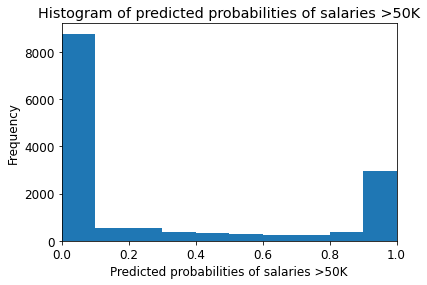

In [77]:
# plot histogram of predicted probabilities

y_pred1 = gnb.predict_proba(X_test)[:, 1]

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')
plt.show()

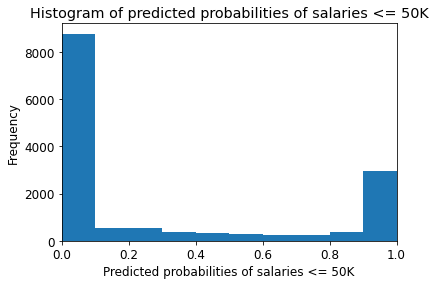

In [78]:
# plot histogram of predicted probabilities

y_pred2 = gnb.predict_proba(X_test)[:, 0]

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries <= 50K')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries <= 50K')
plt.ylabel('Frequency')
plt.show()

# ROC CURVE

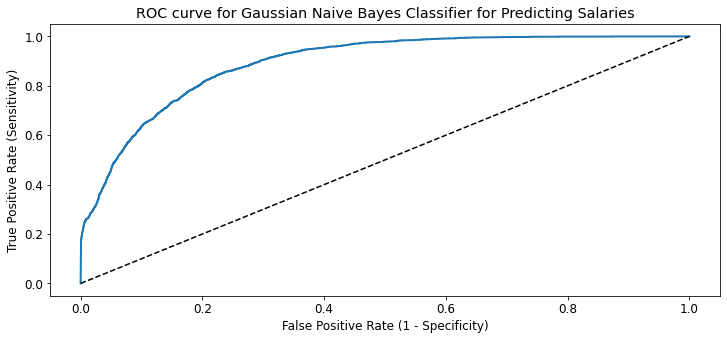

In [79]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [80]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8910


# CROSS VALIDATION

In [81]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


In [82]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83328459 0.82187774 0.83533197 0.82568002 0.81836794 0.81895291
 0.83328459 0.82041533 0.82334016 0.82241077]


In [83]:
accuracy_average = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
for train_index, test_index in skf.split(x,y):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    gnb.fit(X_train,y_train)
    accuracy_average.append(gnb.score(X_train,y_train))
    print(round(gnb.score(X_train,y_train),4))
accuracy_average = sum(accuracy_average)/len(accuracy_average)
print(accuracy_average)

0.8247
0.8248
0.8243
0.8252
0.8261
0.8248
0.825
0.8261
0.825
0.8252
0.8251209097800694


## Interpretation
Using the mean cross-validation, we can conclude that we expect the model to be around 82.51% accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 82.47% accuracy to 82.52% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

Our original model accuracy is 0.0.8257, but the mean cross-validation accuracy is 0.8251. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

## Results and Conclusions
1. In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.0.8257.  

2. The training-set accuracy score is 0.8257 while the test-set accuracy to be 0.8237. These two values are quite comparable. So, there is no sign of overfitting.
3. I have compared the model accuracy score which is 0.8257 with null accuracy score which is 0.7607. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.
4. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.
5. Using the mean cross-validation, we can conclude that we expect the model to be around 82.51% accurate on average.
6. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 82.47% accuracy to 82.52% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
7. Our original model accuracy is 0.8257, but the mean cross-validation accuracy is 0.8251. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# Using KNN algorithm

In [84]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn.fit(x,y)

KNeighborsClassifier()

In [85]:
parameters = dict(n_neighbors = list(range(5,20,2)), algorithm = list(['auto', 'brute']))

In [86]:
grid = GridSearchCV(knn, parameters, cv = 10, scoring = 'f1')
    

In [87]:
print(parameters)

{'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19], 'algorithm': ['auto', 'brute']}


In [88]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='f1')

In [107]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5}


In [92]:
y_predi = knn.predict(X_test)

In [93]:
print(confusion_matrix(y_test, y_predi))

[[3524  191]
 [ 312  857]]


In [94]:
print(accuracy_score(y_test, y_predi))

0.897010647010647


In [95]:
accuracy_average = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
for train_index, test_index in skf.split(x,y):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train,y_train)
    accuracy_average.append(knn.score(X_train,y_train))
    print(round(knn.score(X_train,y_train),4))
    print(round(knn.score(X_train,y_train),4))
accuracy_average = sum(accuracy_average)/len(accuracy_average)
print(accuracy_average)

0.8984
0.8989
0.8978
0.8987
0.8984
0.8983
0.8969
0.8982
0.898
0.8986
0.8982273927428652


## Insight:
cross validation results and model accuracy shows no different, it means the model performs very well

**KNN** accuracy of **0.898** and **Naive Bayes** **0.825** shows **KNN** is best for this project